<a href="https://colab.research.google.com/github/robiulislam1999/CSE718/blob/main/chap08_file02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Examples**

Projecting Population Growth

In [1]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 8.2 MB/s eta 0:00:00


In [2]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [3]:
# import functions from modsim

from modsim import *

In [4]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [5]:
from pandas import read_html

filename = 'World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison',
                  'hyde', 'tanton', 'biraben', 'mj',
                  'thomlinson', 'durand', 'clark']

In [6]:
un = table2.un / 1e9
census = table2.census / 1e9

In [7]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap06.py')

Downloaded chap06.py


In [8]:
from chap06 import run_simulation

def plot_estimates():
    census.plot(style='.', label='Apples')
    un.plot(style='-', label='Oranges')
    decorate(xlabel='Months',
             ylabel='units sold')

Generating Projections

In [9]:
def growth_func_quad(t, pop, system):
    return system.alpha * pop + system.beta * pop**2
t_0 = census.index[0]
p_0 = census[t_0]

system = System(t_0 = t_0,
                p_0 = p_0,
                alpha = 50 / 1000,
                beta = -3.0 / 1000,
                t_end = 2020)
results = run_simulation(system, growth_func_quad)
show(results.tail())

,Quantity
Time,
2016,13.843868
2017,13.961103
2018,14.074421
2019,14.183874
2020,14.289521


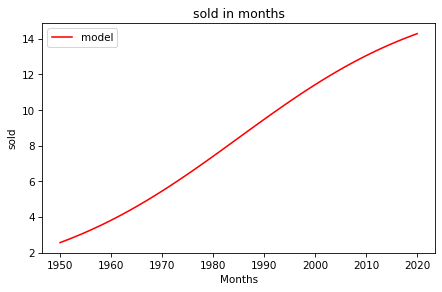

In [10]:











results.plot(color='red', label='model')
decorate(xlabel='Months',
         ylabel='sold',
         title='sold in months')

Comparing Projections

In [11]:
table3 = tables[3]
table3.columns = ['census', 'prb', 'un']
table3.head()

,census,prb,un
Year,,,
2016,7.334772e+09,NaN,7.432663e+09
2017,7.412779e+09,NaN,NaN
2018,7.490428e+09,NaN,NaN
2019,7.567403e+09,NaN,NaN
2020,7.643402e+09,NaN,7.758157e+09


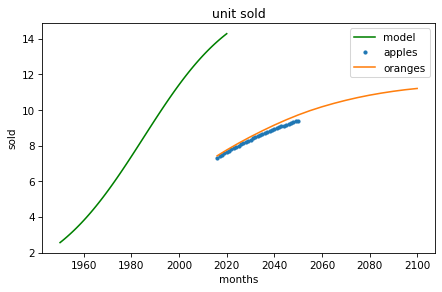

In [12]:
def plot_projections(table):
    """Plot world population projections.

    table: DataFrame with columns 'un' and 'census'
    """
    census_proj = table.census.dropna() / 1e9
    un_proj = table.un.dropna() / 1e9

    census_proj.plot(style='.', label='apples')
    un_proj.plot(style='-', label='oranges')

    decorate(xlabel='months',
             ylabel='sold')
results.plot(color='green', label='model')
plot_projections(table3)
decorate(title='unit sold')

**Exercises**

Exercise 1

In [13]:
diff = census.diff()
show(diff.head())

,census
Year,
1950,NaN
1951,0.037311
1952,0.041832
1953,0.045281
1954,0.048175


In [14]:
alpha = census.diff() / census
show(alpha.head())

,census
Year,
1950,NaN
1951,0.014378
1952,0.015865
1953,0.016883
1954,0.017645


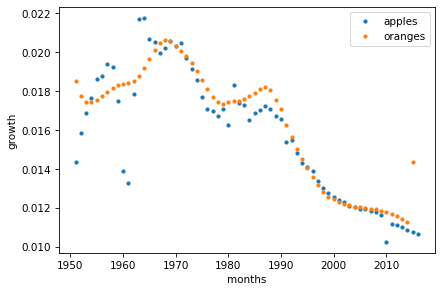

In [15]:
def plot_alpha():
    alpha_census = census.diff() / census
    alpha_census.plot(style='.', label='apples')

    alpha_un = un.diff() / un
    alpha_un.plot(style='.', label='oranges')

    decorate(xlabel='months', ylabel='growth')
plot_alpha()

In [16]:
def alpha_func(t):
    intercept = 0.04
    slope = -0.0035
    return intercept + slope * (t - 1970)
t_array = linspace(1960, 2015, 7)
alpha_array = alpha_func(t_array)

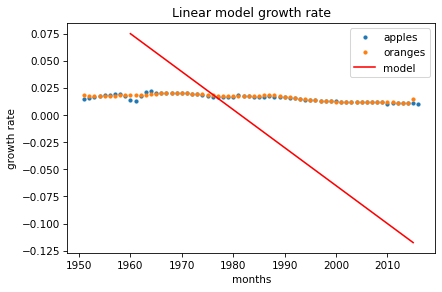

In [17]:
from matplotlib.pyplot import plot

plot_alpha()
plot(t_array, alpha_array, label='model', color='red')

decorate(ylabel='growth rate',
         title='Linear model growth rate')

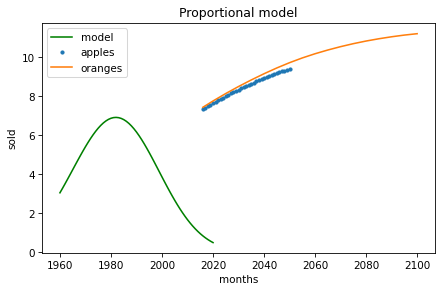

In [18]:
t_0 = 1960
t_end = 2020
p_0 = census[t_0]
system = System(t_0=t_0,t_end=t_end,p_0 = p_0,alpha_func = alpha_func)
def growth_func_alpha(t, pop, system):
    return system.alpha_func(t) * pop
growth_func_alpha(t_0, p_0, system)
result = run_simulation(system, growth_func_alpha);
result.plot(color='green', label='model')
plot_projections(table3)
decorate(title='Proportional model')